# Nombre: León Emiliano García Pérez
# Matrícula: A00573074

# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [201]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = Ruta            = 'datasets'

In [202]:
# Import the packages that we will be using

import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [203]:
# Dataset url
url = '/SyntheticData4Clustering_X.csv'

# Load the dataset
df  = pd.read_csv(Ruta+url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [204]:
# Print the dataframe

df

x1         x2        x3        x4         x5         x6
0     1.914825  -1.380503 -3.609674  4.236011  -5.158681   5.712978
1     1.356415   9.767893  7.263659  8.750819   5.568930  -6.039122
2     1.185186  11.528344  9.999419  7.890027   7.308210  -8.899397
3    -1.739155  12.648965  7.965588  7.850296  10.235743 -10.175542
4     7.890985  -3.210880 -7.672016  2.438106   3.310904  -3.308334
...        ...        ...       ...       ...        ...        ...
1019  3.685106  -1.715503 -5.674443  6.510551  -0.121862  -6.166649
1020 -7.014173  -9.697874  4.093272 -0.590262  -9.882245   2.339336
1021 -2.993762   7.528182  7.877165  8.895835   9.318544  -7.445100
1022  4.576644  -1.720788 -6.581909  4.745839   1.497980  -4.828975
1023  2.616634   0.274593 -5.521864  9.582110   0.878266  -8.274990

[1024 rows x 6 columns]

In [205]:
# get the number of observations and variables

print("Observations: ", df.shape[0])
print("Variables: ", df.shape[1]) 

Observations:  1024
Variables:  6


2. Drop rows with any missing values


In [206]:
# Drop rows with NaN values if existing

df = df.dropna() #Dropping missing data

# Print the new shape

df.shape


(1024, 6)

3. Scatterplot




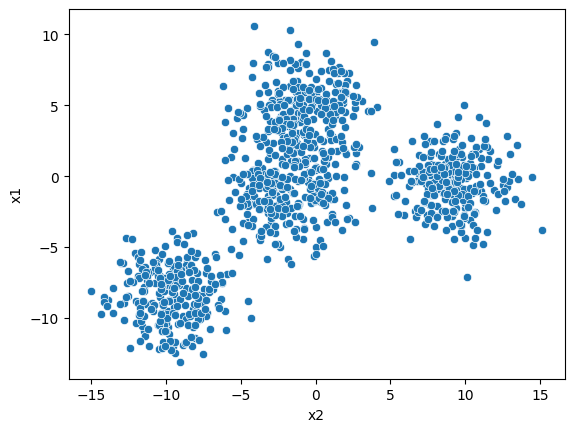

In [207]:
# Scatterplot of x1 and x2

sns.scatterplot(data = df, y = "x1", x = "x2")
plt.show()

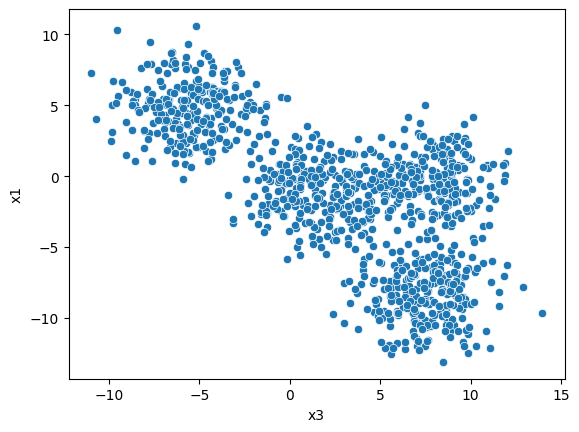

In [208]:
# Scatterplot of x1 and x3

sns.scatterplot(data = df, y = "x1", x = "x3")
plt.show()

Difficult to plot independetly all combinations, let's use pairplot

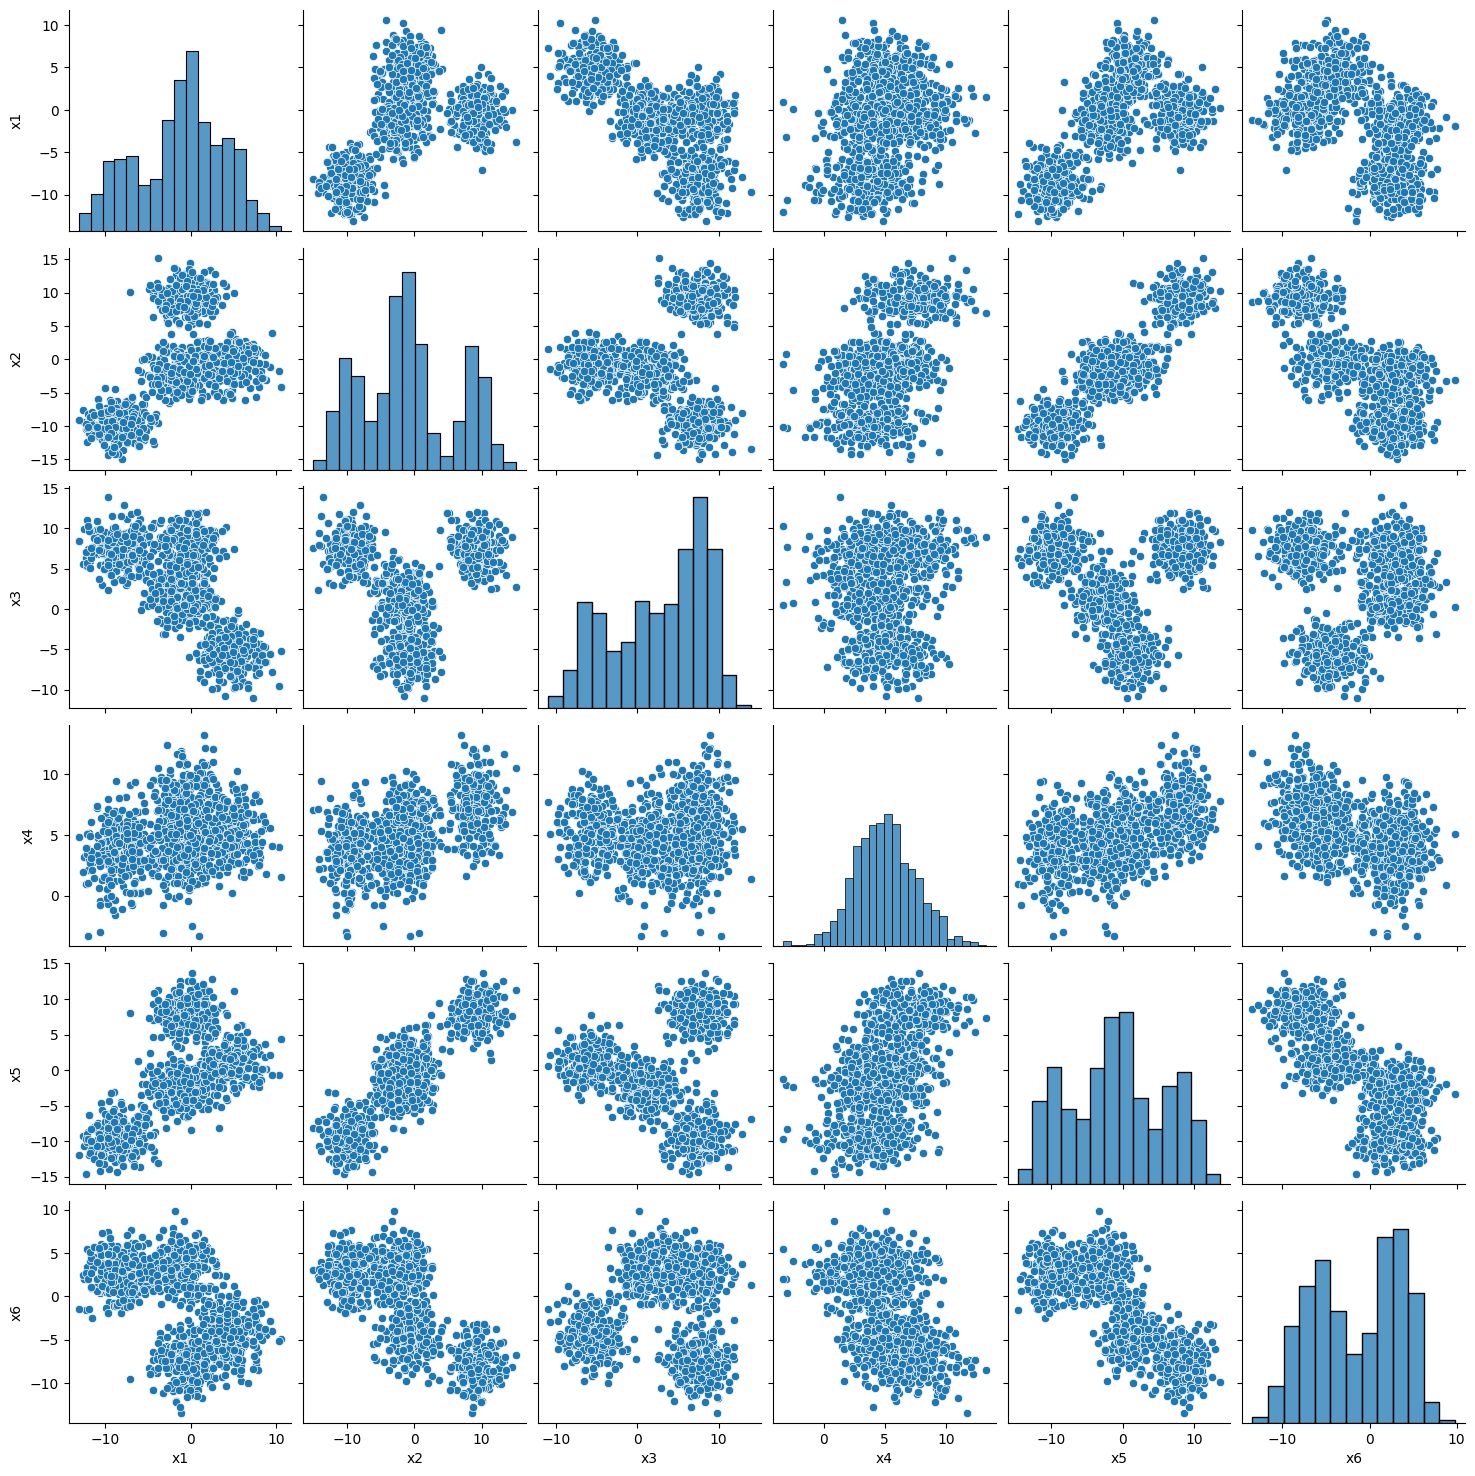

In [209]:
# Pairplot: Scatterplot of all variables
sns.pairplot(df)
plt.show()

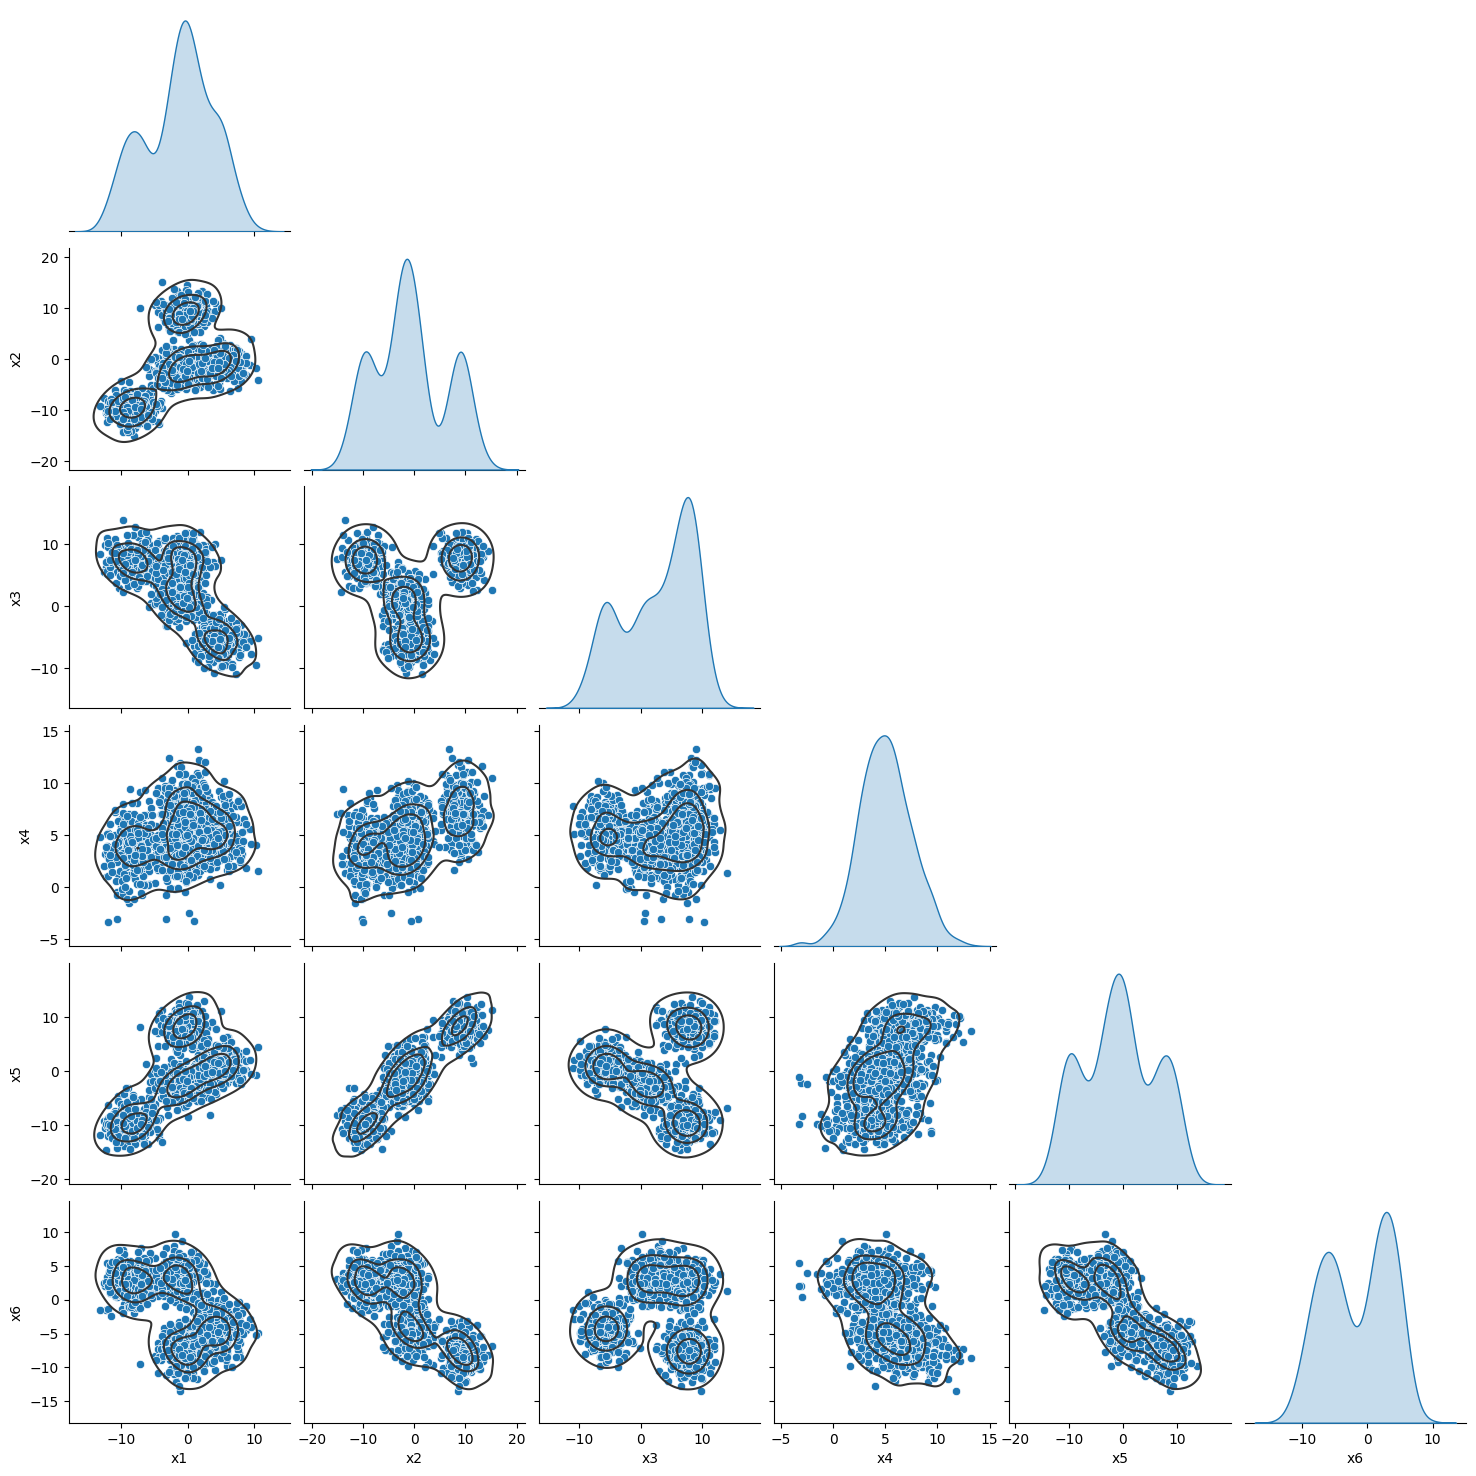

In [210]:
# Pairplot: Scatterplot of all variables

plot = sns.pairplot(df, corner=True, diag_kind="kde")
plot.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [211]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  =  3 # Let's assume there are 2,3,4,5...? clusters/groups
km = kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(df)

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)


# Print estimated cluster of each point in the dataset
yestimated

array([2, 1, 1, ..., 1, 2, 2])

In [212]:
# Add a new column to the dataset with the cluster information

df["Cluster"] = yestimated

In [213]:
# Label of the estimated clusters

print("Cluster",km.labels_)

print(df.Cluster.unique())

print(df)

Cluster [2 1 1 ... 1 2 2]
[2 1 0]
            x1         x2        x3        x4         x5         x6  Cluster
0     1.914825  -1.380503 -3.609674  4.236011  -5.158681   5.712978        2
1     1.356415   9.767893  7.263659  8.750819   5.568930  -6.039122        1
2     1.185186  11.528344  9.999419  7.890027   7.308210  -8.899397        1
3    -1.739155  12.648965  7.965588  7.850296  10.235743 -10.175542        1
4     7.890985  -3.210880 -7.672016  2.438106   3.310904  -3.308334        2
...        ...        ...       ...       ...        ...        ...      ...
1019  3.685106  -1.715503 -5.674443  6.510551  -0.121862  -6.166649        2
1020 -7.014173  -9.697874  4.093272 -0.590262  -9.882245   2.339336        0
1021 -2.993762   7.528182  7.877165  8.895835   9.318544  -7.445100        1
1022  4.576644  -1.720788 -6.581909  4.745839   1.497980  -4.828975        2
1023  2.616634   0.274593 -5.521864  9.582110   0.878266  -8.274990        2

[1024 rows x 7 columns]


In [214]:
# Cluster centroides

print("Cluster Centers: ", km.cluster_centers_)

Cluster Centers:  [[-8.3650671  -9.59550917  7.40711607  3.77249056 -9.44226128  2.67666451]
 [-0.44229417  9.13121533  7.61409814  7.22984721  8.13001382 -7.6264221 ]
 [ 1.85043266 -1.34592151 -2.11883656  4.5718429  -0.79519547 -0.55114018]]


In [215]:
# Sum of squared error (sse) of the final model

print("SSE: ", km.inertia_)

SSE:  44295.1263266536


In [216]:
# The number of iterations required to converge

print("Iterations: ", km.n_iter_)

Iterations:  3


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

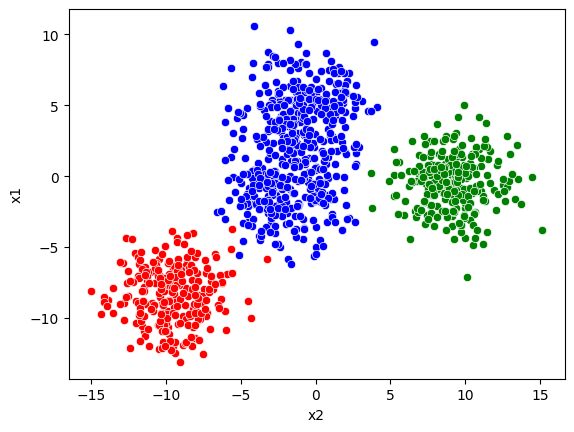

In [217]:
# Get a dataframe with the data of each clsuter
df0 = df[df["Cluster"] == 0]
df1 = df[df["Cluster"] == 1]
df2 = df[df["Cluster"] == 2]



# Scatter plot of each cluster
sns.scatterplot(data = df0, y = "x1", x = "x2", color = "red")
sns.scatterplot(data = df1, y = "x1", x = "x2", color = "green")
sns.scatterplot(data = df2, y = "x1", x = "x2", color = "blue")
plt.show()


# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [220]:
# Intialize a list to hold sum of squared error (sse)
SSE = []

# Define values of k

K = [1,2,3,4,5,6,7,8,9,10]

# For each k

for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df)
    SSE.append(km.inertia_)


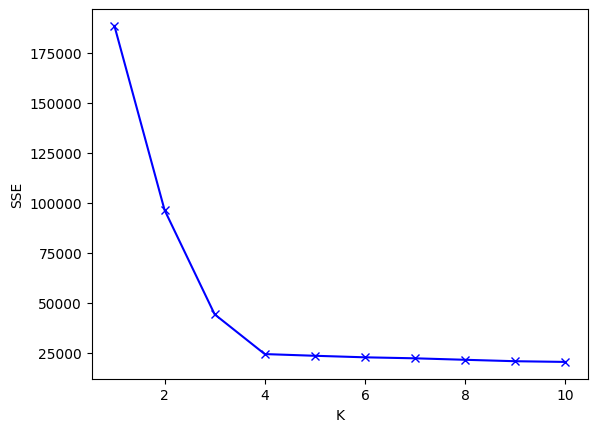

In [221]:
# Plot sse versus k

plt.plot(K, SSE, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: 

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

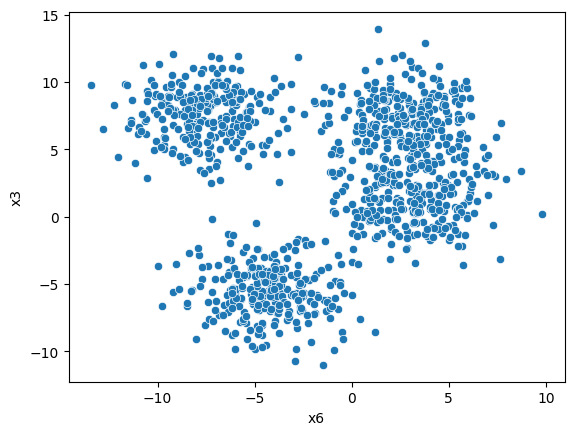

In [222]:
sns.scatterplot(data = df, y = "x3", x = "x6")
plt.show()

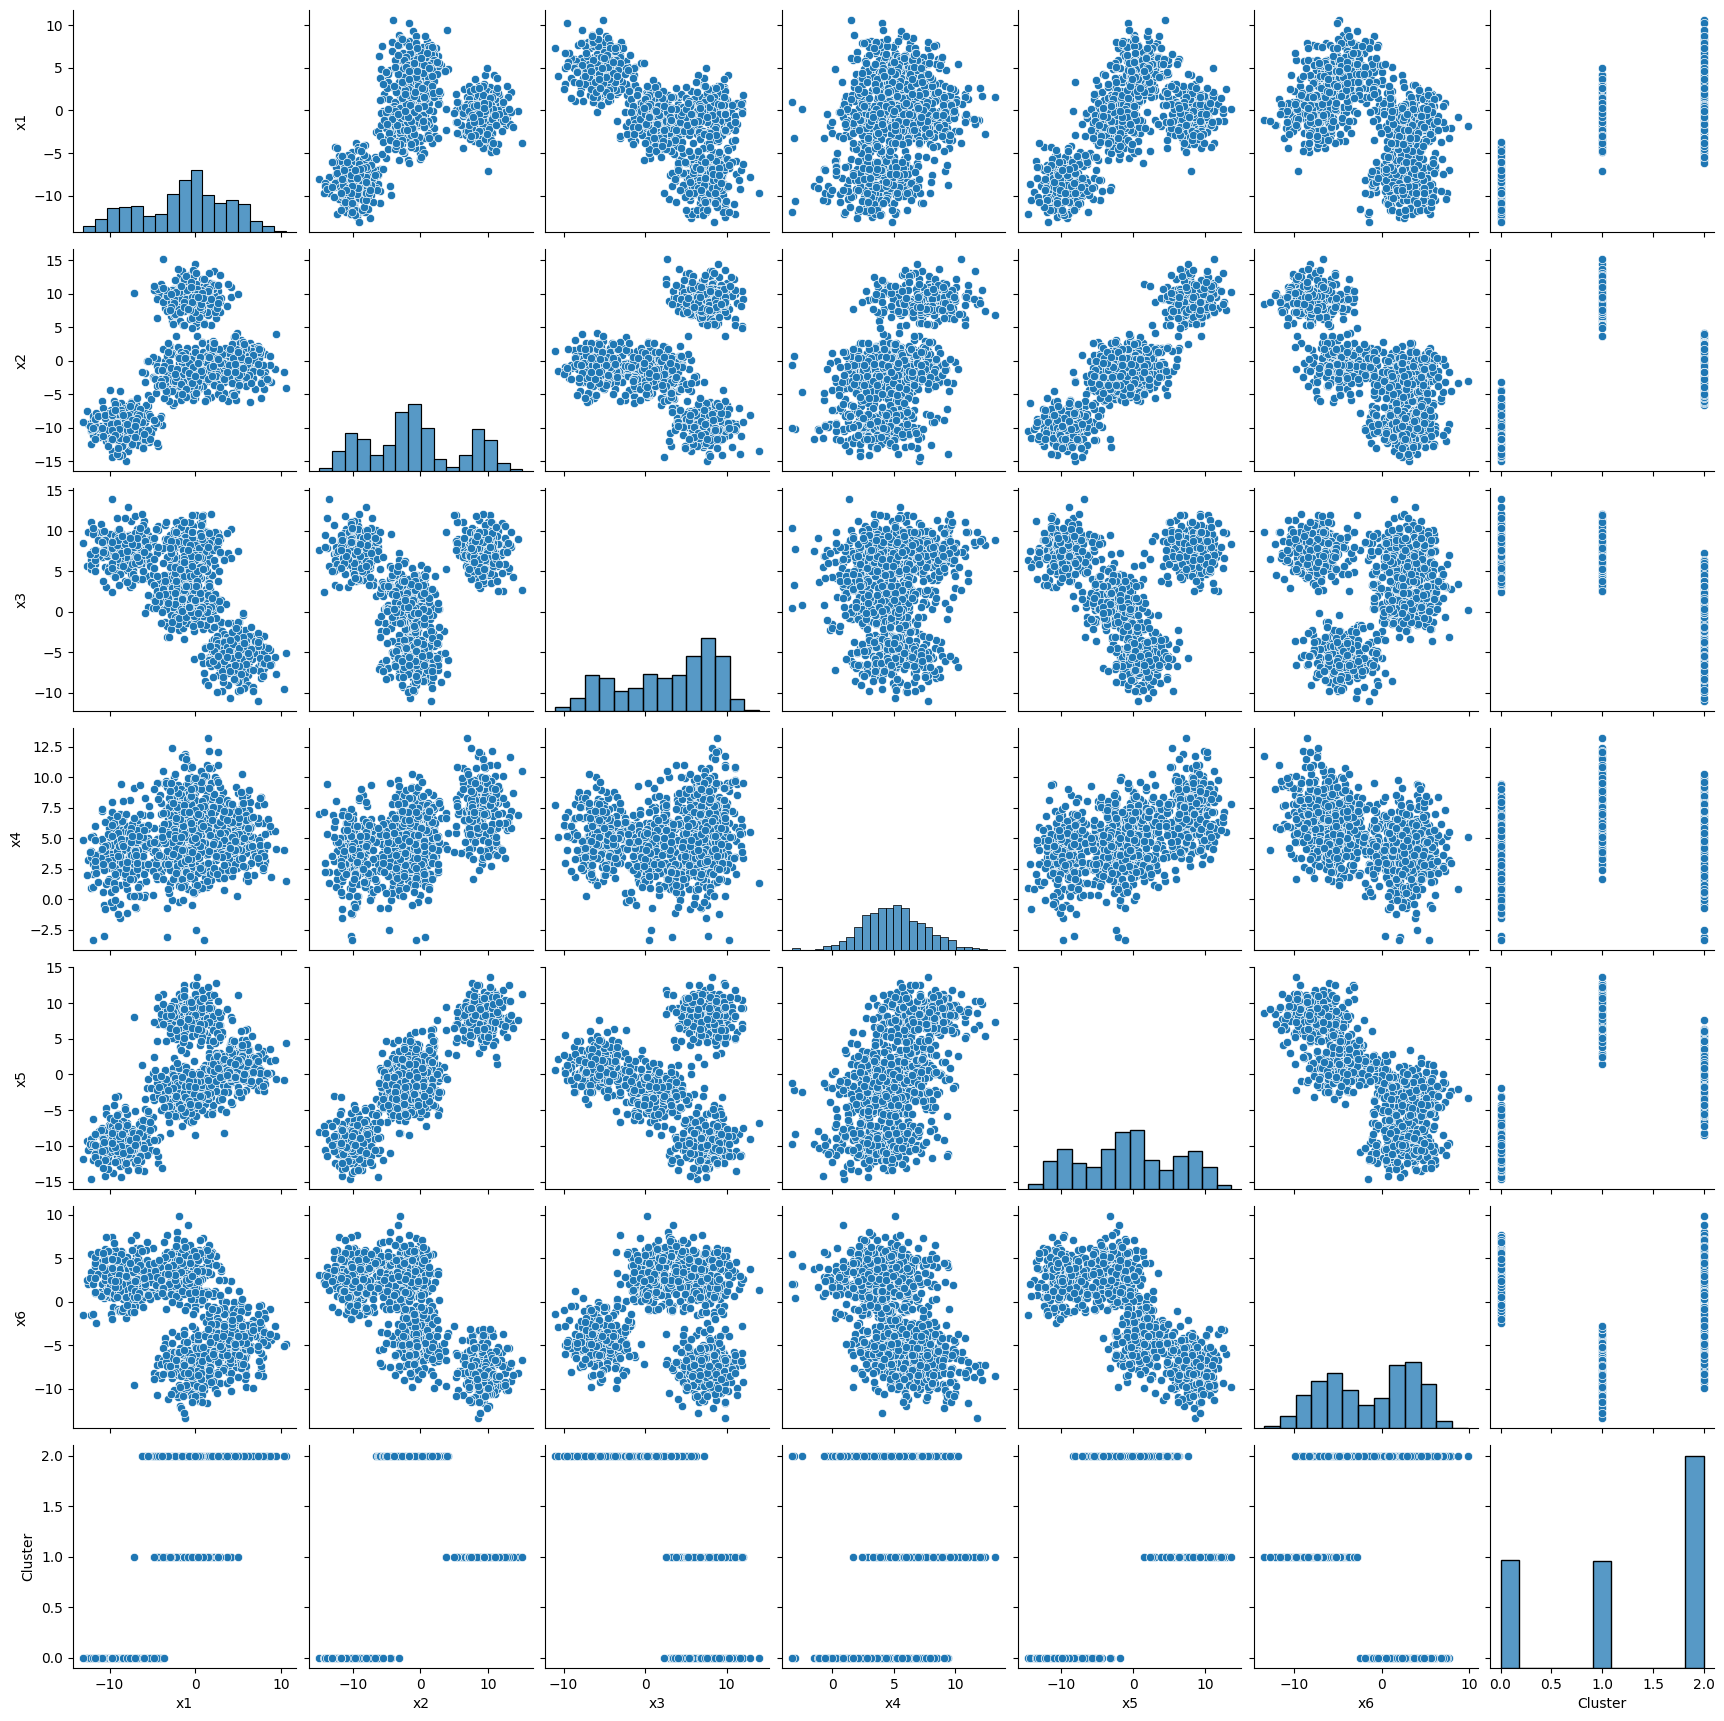

In [223]:
sns.pairplot(df)
plt.show()

In [224]:
print ("Obersvations: The extra column of Cluster gets adjust to the k number of clusters than has been provide, it still seeing that there are 3 clusters in the differnts plots, but with the analisis -Elbow Plot - made can be affirmed that 3 clusters is a good aproximation of number of clusters with a low SSE.")

Obersvations: The extra column of Cluster gets adjust to the k number of clusters than has been provide, it still seeing that there are 3 clusters in the differnts plots, but with the analisis -Elbow Plot - made can be affirmed that 3 clusters is a good aproximation of number of clusters with a low SSE.


# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics

## Do clustering with the iris flower dataset to form clusters using as features the four features NOTE: THE PROFFESOR SAID THAT THIS PART OF THE ACTIVITY IT IS THE SAME THAN REPEAT THE TUTORIAL WITH THE IRIS DATASET

In [225]:
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

In [226]:
newUrl = '/iris/iris.csv'

newDatos = pd.read_csv(Ruta+newUrl, header=None, names = ["PetalWidth", "PetalLength", "SepalWidth", "SepalLength", "Type"])

In [227]:
newDatos = newDatos.dropna() #Dropping missing data

In [228]:
# Print the dataframe

newDatos

PetalWidth  PetalLength  SepalWidth  SepalLength            Type
0           5.1          3.5         1.4          0.2     Iris-setosa
1           4.9          3.0         1.4          0.2     Iris-setosa
2           4.7          3.2         1.3          0.2     Iris-setosa
3           4.6          3.1         1.5          0.2     Iris-setosa
4           5.0          3.6         1.4          0.2     Iris-setosa
..          ...          ...         ...          ...             ...
145         6.7          3.0         5.2          2.3  Iris-virginica
146         6.3          2.5         5.0          1.9  Iris-virginica
147         6.5          3.0         5.2          2.0  Iris-virginica
148         6.2          3.4         5.4          2.3  Iris-virginica
149         5.9          3.0         5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [229]:
# get the number of observations and variables

print("Observations: ", newDatos.shape[0])
print("Variables: ", newDatos.shape[1]) 

Observations:  150
Variables:  5


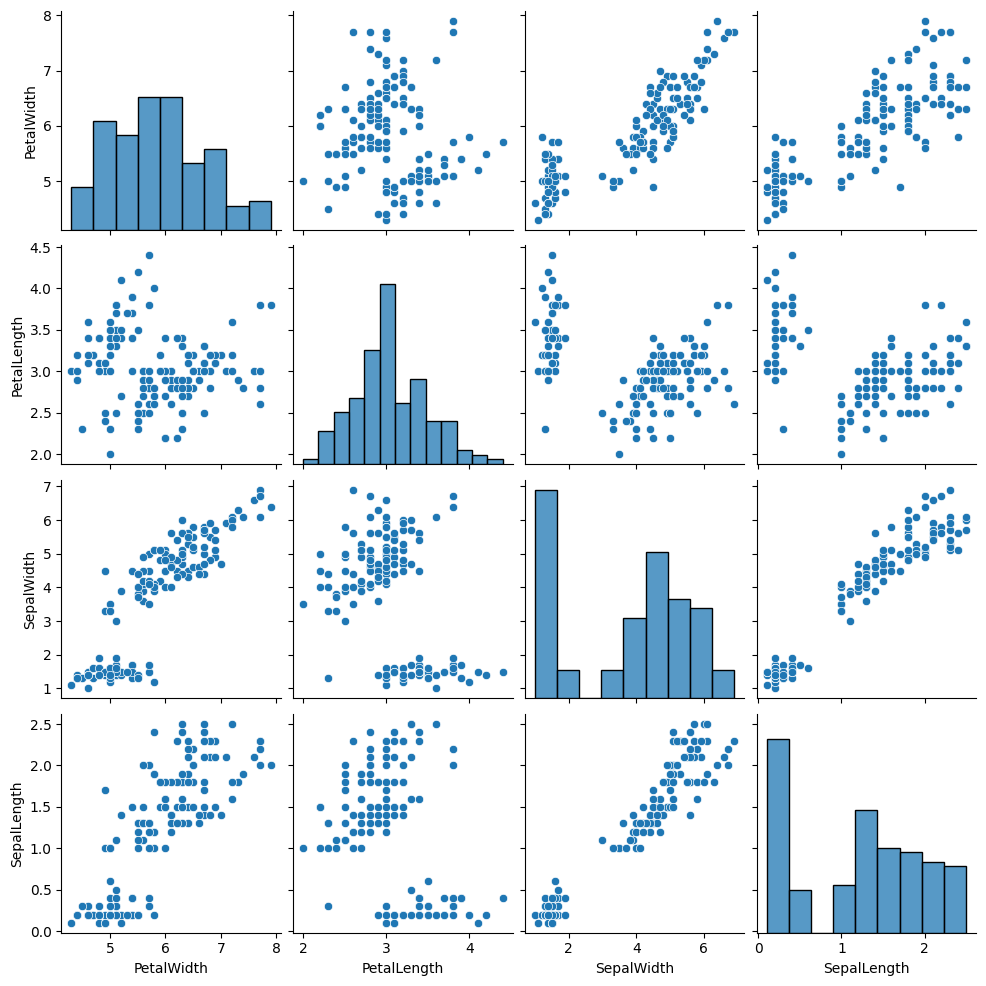

In [230]:
sns.pairplot(newDatos)
plt.show()

In [231]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
datosSinType = newDatos.drop(columns="Type") 
K  =  3 
km = kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(datosSinType)

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(datosSinType)


# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [232]:
#Add a new column to the dataset with the cluster information

datosSinType["Cluster"] = yestimated

In [233]:
# Label of the estimated clusters

print("ClusterLabels",km.labels_)

print(datosSinType.Cluster.unique())

print(datosSinType)

ClusterLabels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[0 1 2]
     PetalWidth  PetalLength  SepalWidth  SepalLength  Cluster
0           5.1          3.5         1.4          0.2        0
1           4.9          3.0         1.4          0.2        0
2           4.7          3.2         1.3          0.2        0
3           4.6          3.1         1.5          0.2        0
4           5.0          3.6         1.4          0.2        0
..          ...          ...         ...          ...      ...
145         6.7          3.0         5.2          2.3        1
146         6.3          2.5         5.0          1.9        2
147         6.5          3.0         5.2          2.0        1
148         6.2          3.4         5.4  

In [234]:
# Cluster centroides

print("Cluster Centers: ", km.cluster_centers_)

Cluster Centers:  [[5.006      3.418      1.464      0.244     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [235]:
# Sum of squared error (sse) of the final model

print("SSE: ", km.inertia_)

SSE:  78.9450658259773


In [236]:
# The number of iterations required to converge

print("Iterations: ", km.n_iter_)

Iterations:  8


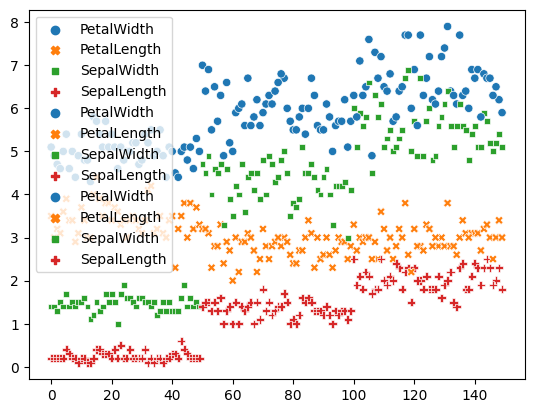

In [237]:
# Get a dataframe with the data of each clsuter
dfa = datosSinType[datosSinType["Cluster"] == 0].drop(columns="Cluster")
dfb = datosSinType[datosSinType["Cluster"] == 1].drop(columns="Cluster")
dfc = datosSinType[datosSinType["Cluster"] == 2].drop(columns="Cluster")


# Scatter plot of each cluster
sns.scatterplot(data = dfa, color = "red")
sns.scatterplot(data = dfb, color = "green")
sns.scatterplot(data = dfc, color = "blue")
plt.show()

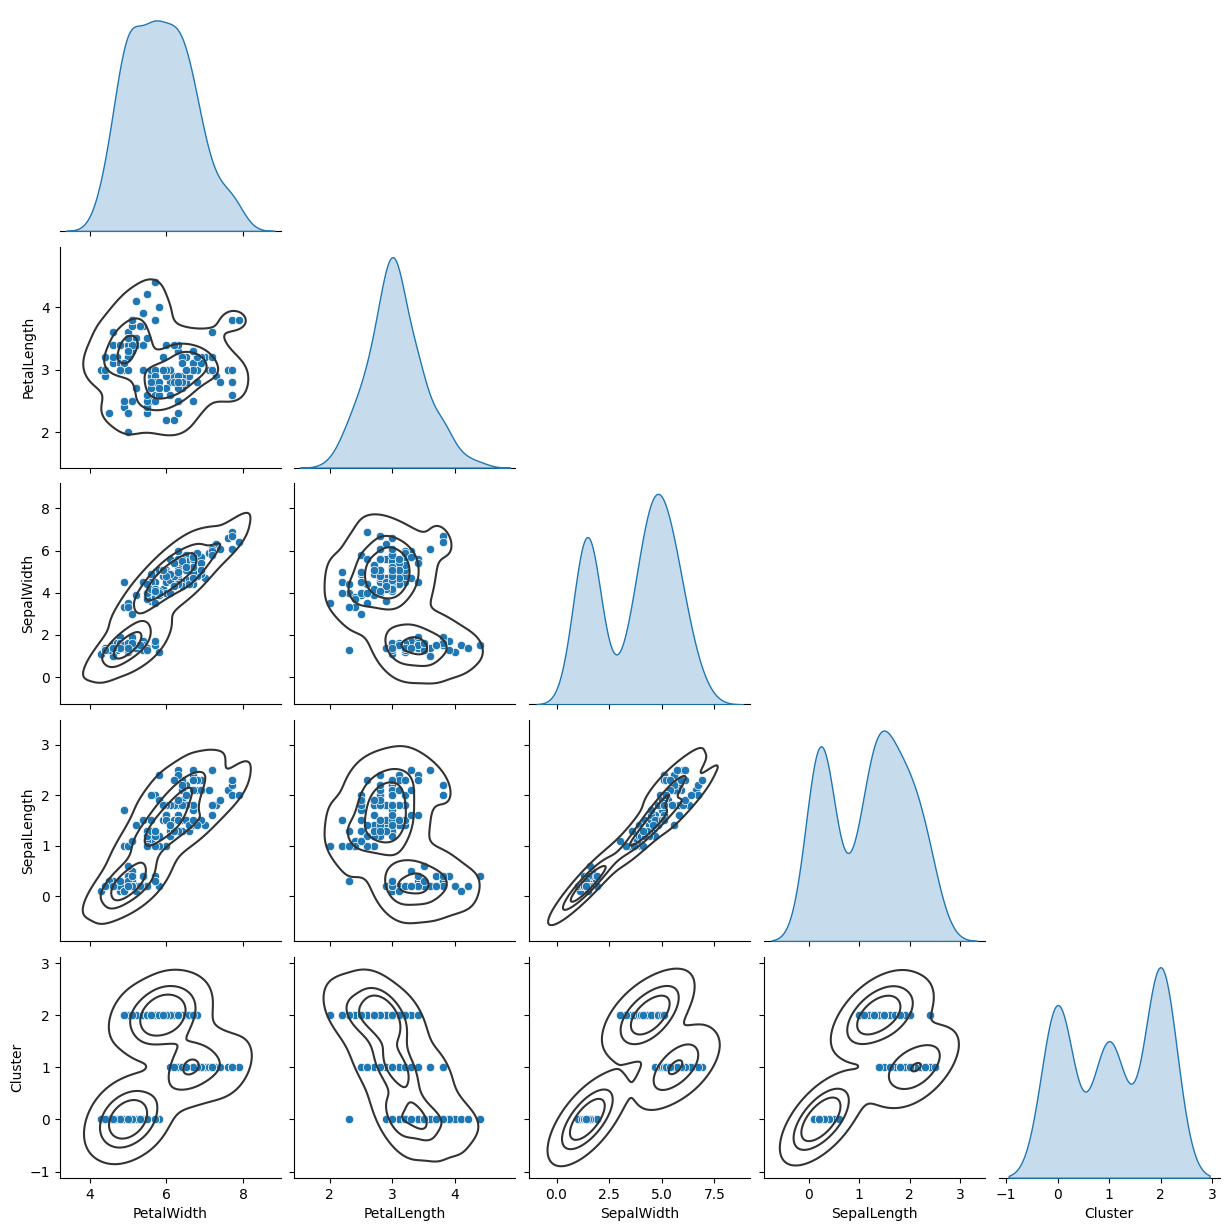

In [238]:
plot = sns.pairplot(datosSinType, corner=True, diag_kind="kde")
plot.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

In [239]:
# Intialize a list to hold sum of squared error (sse)
SSE = []

# Define values of k

K = [1,2,3,4,5,6,7,8,9,10]

# For each k

for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(datosSinType)
    SSE.append(km.inertia_)

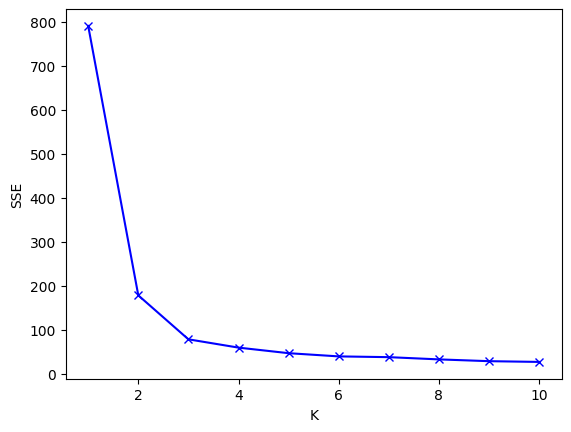

In [240]:
# Plot sse versus k

plt.plot(K, SSE, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

## Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

In [241]:
newUrl = '/iris/iris.csv'

newDatos = pd.read_csv(Ruta+newUrl, header=None, names = ["PetalWidth", "PetalLength", "SepalWidth", "SepalLength", "Type"])

newDatos = newDatos.dropna() #Dropping missing data

newDatos = newDatos.drop(columns="SepalWidth")
newDatos = newDatos.drop(columns="SepalLength")

# Print the dataframe

newDatos

PetalWidth  PetalLength            Type
0           5.1          3.5     Iris-setosa
1           4.9          3.0     Iris-setosa
2           4.7          3.2     Iris-setosa
3           4.6          3.1     Iris-setosa
4           5.0          3.6     Iris-setosa
..          ...          ...             ...
145         6.7          3.0  Iris-virginica
146         6.3          2.5  Iris-virginica
147         6.5          3.0  Iris-virginica
148         6.2          3.4  Iris-virginica
149         5.9          3.0  Iris-virginica

[150 rows x 3 columns]

Observations:  150
Variables:  3


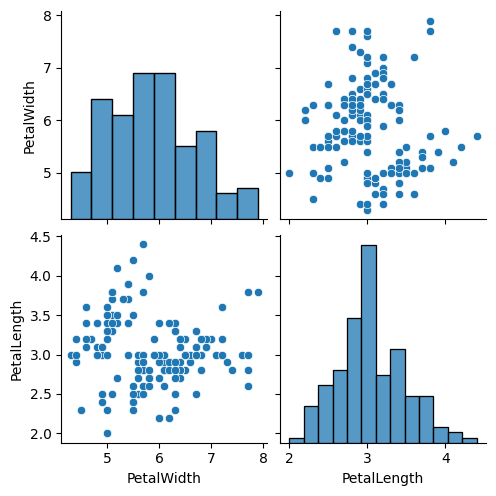

In [242]:
# get the number of observations and variables

print("Observations: ", newDatos.shape[0])
print("Variables: ", newDatos.shape[1]) 

sns.pairplot(newDatos)
plt.show()

In [243]:
datosSinType = newDatos.drop(columns="Type") 

# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  =  3 
km = kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(datosSinType)

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(datosSinType)


# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [244]:
#Add a new column to the dataset with the cluster information

datosSinType["Cluster"] = yestimated

In [245]:
# Label of the estimated clusters

print("ClusterLabels",km.labels_)

print(datosSinType.Cluster.unique())

print(datosSinType)

ClusterLabels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 1 0 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[0 1 2]
     PetalWidth  PetalLength  Cluster
0           5.1          3.5        0
1           4.9          3.0        0
2           4.7          3.2        0
3           4.6          3.1        0
4           5.0          3.6        0
..          ...          ...      ...
145         6.7          3.0        1
146         6.3          2.5        2
147         6.5          3.0        1
148         6.2          3.4        1
149         5.9          3.0        2

[150 rows x 3 columns]


In [246]:
# Cluster centroides

print("Cluster Centers: ", km.cluster_centers_)

# Sum of squared error (sse) of the final model

print("SSE: ", km.inertia_)

# The number of iterations required to converge

print("Iterations: ", km.n_iter_)

Cluster Centers:  [[5.00392157 3.4       ]
 [6.82391304 3.07826087]
 [5.8        2.7       ]]
SSE:  37.14117220801364
Iterations:  17


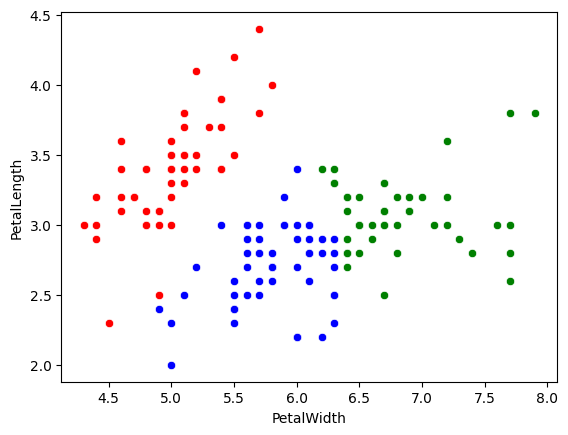

In [247]:
# Get a dataframe with the data of each clsuter
dfa = datosSinType[datosSinType["Cluster"] == 0].drop(columns="Cluster")
dfb = datosSinType[datosSinType["Cluster"] == 1].drop(columns="Cluster")
dfc = datosSinType[datosSinType["Cluster"] == 2].drop(columns="Cluster")


# Scatter plot of each cluster
sns.scatterplot(data = dfa, x="PetalWidth",y="PetalLength", color = "red")
sns.scatterplot(data = dfb, x="PetalWidth",y="PetalLength", color = "green")
sns.scatterplot(data = dfc, x="PetalWidth",y="PetalLength", color = "blue")
plt.show()

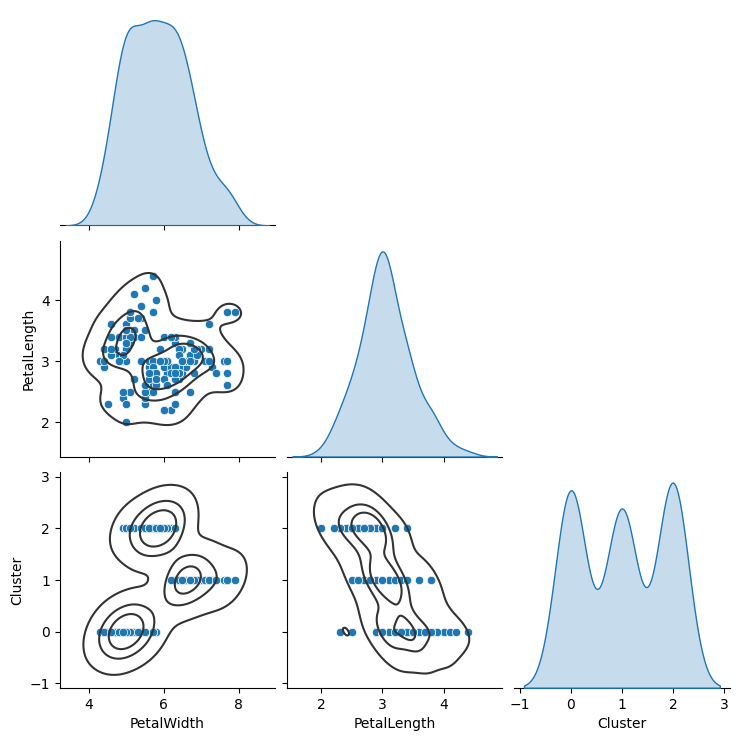

In [248]:
plot = sns.pairplot(datosSinType, corner=True, diag_kind="kde")
plot.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

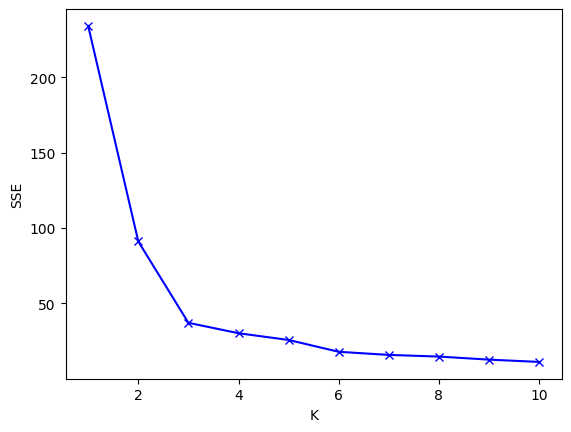

In [249]:
# Intialize a list to hold sum of squared error (sse)
SSE = []

# Define values of k

K = [1,2,3,4,5,6,7,8,9,10]

# For each k

for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(datosSinType)
    SSE.append(km.inertia_)
    
# Plot sse versus k

plt.plot(K, SSE, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

## Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

In [250]:
newUrl = '/iris/iris.csv'

newDatos = pd.read_csv(Ruta+newUrl, header=None, names = ["PetalWidth", "PetalLength", "SepalWidth", "SepalLength", "Type"])

newDatos = newDatos.dropna() #Dropping missing data

newDatos = newDatos.drop(columns="PetalWidth")
newDatos = newDatos.drop(columns="PetalLength")

# Print the dataframe

newDatos

SepalWidth  SepalLength            Type
0           1.4          0.2     Iris-setosa
1           1.4          0.2     Iris-setosa
2           1.3          0.2     Iris-setosa
3           1.5          0.2     Iris-setosa
4           1.4          0.2     Iris-setosa
..          ...          ...             ...
145         5.2          2.3  Iris-virginica
146         5.0          1.9  Iris-virginica
147         5.2          2.0  Iris-virginica
148         5.4          2.3  Iris-virginica
149         5.1          1.8  Iris-virginica

[150 rows x 3 columns]

Observations:  150
Variables:  3


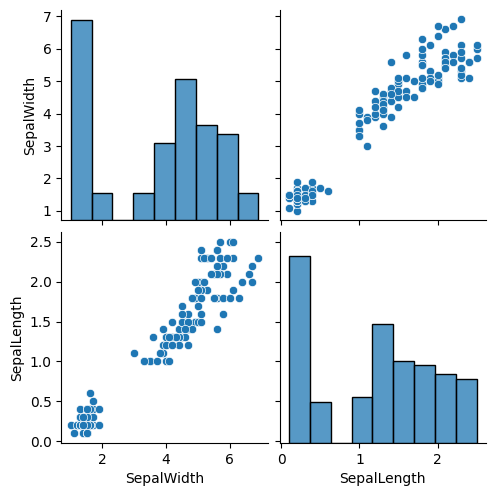

In [251]:
# get the number of observations and variables

print("Observations: ", newDatos.shape[0])
print("Variables: ", newDatos.shape[1]) 

sns.pairplot(newDatos)
plt.show()

In [252]:
datosSinType = newDatos.drop(columns="Type") 

# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  =  3 
km = kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(datosSinType)

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(datosSinType)


# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [253]:
#Add a new column to the dataset with the cluster information

datosSinType["Cluster"] = yestimated

In [254]:
# Label of the estimated clusters

print("ClusterLabels",km.labels_)

print(datosSinType.Cluster.unique())

print(datosSinType)

ClusterLabels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]
[0 2 1]
     SepalWidth  SepalLength  Cluster
0           1.4          0.2        0
1           1.4          0.2        0
2           1.3          0.2        0
3           1.5          0.2        0
4           1.4          0.2        0
..          ...          ...      ...
145         5.2          2.3        1
146         5.0          1.9        1
147         5.2          2.0        1
148         5.4          2.3        1
149         5.1          1.8        1

[150 rows x 3 columns]


In [255]:
# Cluster centroides

print("Cluster Centers: ", km.cluster_centers_)

# Sum of squared error (sse) of the final model

print("SSE: ", km.inertia_)

# The number of iterations required to converge

print("Iterations: ", km.n_iter_)

Cluster Centers:  [[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]
SSE:  31.387758974358977
Iterations:  6


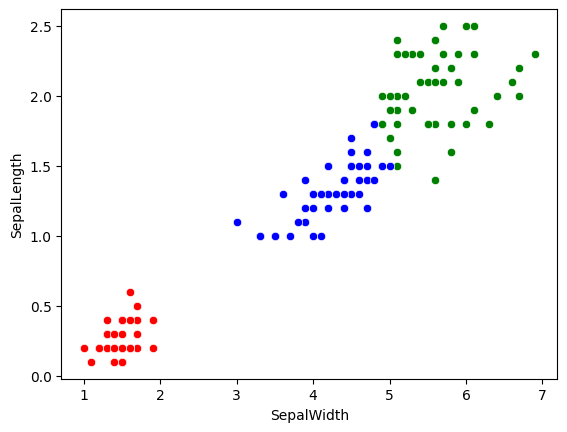

In [256]:
# Get a dataframe with the data of each clsuter
dfa = datosSinType[datosSinType["Cluster"] == 0].drop(columns="Cluster")
dfb = datosSinType[datosSinType["Cluster"] == 1].drop(columns="Cluster")
dfc = datosSinType[datosSinType["Cluster"] == 2].drop(columns="Cluster")


# Scatter plot of each cluster
sns.scatterplot(data = dfa, x="SepalWidth",y="SepalLength", color = "red")
sns.scatterplot(data = dfb, x="SepalWidth",y="SepalLength", color = "green")
sns.scatterplot(data = dfc, x="SepalWidth",y="SepalLength", color = "blue")
plt.show()

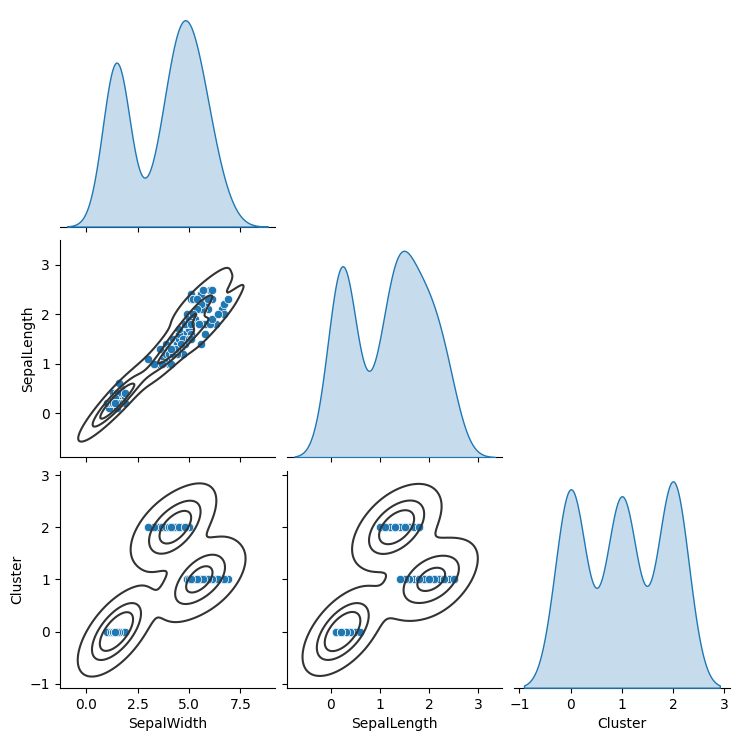

In [257]:
plot = sns.pairplot(datosSinType, corner=True, diag_kind="kde")
plot.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

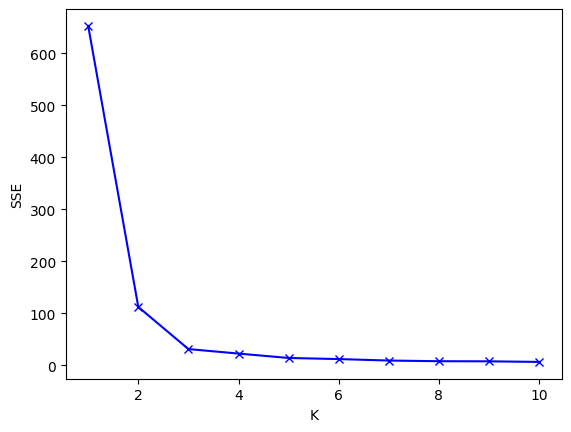

In [258]:
# Intialize a list to hold sum of squared error (sse)
SSE = []

# Define values of k

K = [1,2,3,4,5,6,7,8,9,10]

# For each k

for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(datosSinType)
    SSE.append(km.inertia_)
    
# Plot sse versus k

plt.plot(K, SSE, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

## Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics NOTE: THE PROFFESOR SAID THAT THIS PART OF THE ACTIVITY IS NOT NECCESARY TO BE DO IT